## Least Square Estimator (LSE) using Matrix

The matrix form that represents $N$ linear equations is given by
$$
\mathbf{y} = \mathbf{X}\mathbf{\theta} .
$$
The LS esimator provides a solution that minimizes the residual error $J(\mathbf{\theta}) = (\mathbf{y} - \mathbf{X}\mathbf{\theta})^T(\mathbf{y} - \mathbf{X}\mathbf{\theta})$. 

<i>(looks like a SSE)</i>

The solution is
$$
\mathbf{\theta}^T = \mathbf{y}^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1} \enspace .
$$

We are going to implent this equation and calculate the parameters to fit the line.

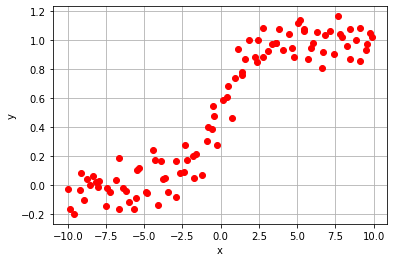

In [29]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

x = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-x))

x = x + 0.1 * np.random.randn(x.size)
y = y + 0.1 * np.random.randn(y.size)

plt.plot(x, y, 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.grid()
plt.show()

**Calculate the parameters in theta by applying the above equation**

To match the matrix form, we append 1s at the end of X.

In [30]:
a=0
b=0

# We form the sample matrix
X = np.column_stack([x, np.ones_like(x)])
print("Now, the X matrix looks like this")
print()
print(X)
print()

# We solve the model parameters in theta
theta = np.dot(np.dot(y.T,X), np.linalg.inv( np.dot(X.T, X) ) )

# theta = y.T @ X @ np.linalg.inv(X.T @ X) # with operator overloading

a, b = theta

print(f'a={a:.4f} and b={b:.4f}')

Now, the X matrix looks like this

[[-10.00005279   1.        ]
 [ -9.82546994   1.        ]
 [ -9.60988815   1.        ]
 [ -9.19547078   1.        ]
 [ -9.16370826   1.        ]
 [ -8.91381812   1.        ]
 [ -8.75778063   1.        ]
 [ -8.53182886   1.        ]
 [ -8.34648866   1.        ]
 [ -8.14403684   1.        ]
 [ -7.9888193    1.        ]
 [ -8.0083721    1.        ]
 [ -7.46148157   1.        ]
 [ -7.5273028    1.        ]
 [ -7.25809237   1.        ]
 [ -6.86804248   1.        ]
 [ -6.66428038   1.        ]
 [ -6.64810579   1.        ]
 [ -6.36174588   1.        ]
 [ -6.19995052   1.        ]
 [ -5.99001451   1.        ]
 [ -5.65784661   1.        ]
 [ -5.56828294   1.        ]
 [ -5.50112394   1.        ]
 [ -5.34560578   1.        ]
 [ -4.86613006   1.        ]
 [ -4.80419654   1.        ]
 [ -4.42800585   1.        ]
 [ -4.31152746   1.        ]
 [ -4.1223271    1.        ]
 [ -3.90246692   1.        ]
 [ -3.74748852   1.        ]
 [ -3.62953448   1.        ]
 [ -3.47

Plot the regression line and calculate the residual error.

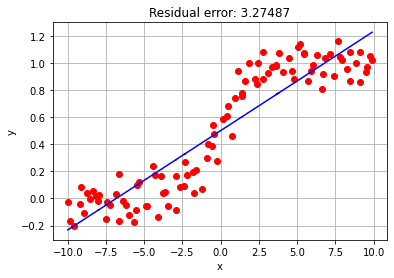

In [31]:
plt.plot(x, y, 'ro')
plt.plot(x, a*x + b, 'b-')

plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.grid()
plt.title('Residual error: %.5f' % (np.sum((y - (a*x + b))**2)))
plt.show()

# Higher Order Fitting


The nice property of the LSE in the matrix form is that it is not limited to the first degree polynomials anymore, but you can form the "data matrix" $\mathbf{X}$ for any degree. Let's try the **second order polynomial:**
$$
y[n] = ax^2[n] + bx[n] + c .
$$

Also: we use the ready-made function `np.linalg.lstsq` to solve the "Least-Square fit".

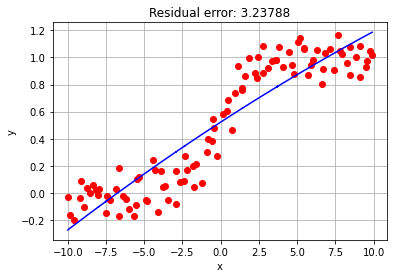

In [32]:
# Second order polynomial
X = np.column_stack([x**2, x, np.ones_like(x)])
theta, residual, _, _ = np.linalg.lstsq(X, y,rcond=None)

a, b, c = theta
plt.plot(x, y, 'ro')
plt.plot(x, a*x**2 + b*x + c, 'b-')

plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.title('Residual error: %.5f' % (residual))
plt.grid()
plt.show()

#### Third Order

We can observe that as we increase the order of polynomial, the residual error is getting lower.

[-0.00084268 -0.00060095  0.12475369  0.52145409]


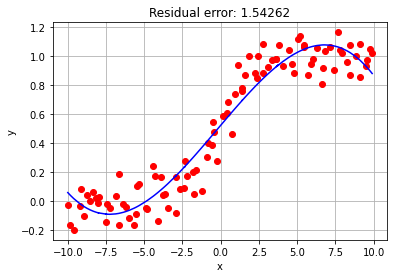

In [69]:
# Third order polynomial
X = np.column_stack([x**3, x**2, x, np.ones_like(x)])
theta, residual, _, _ = np.linalg.lstsq(X, y,rcond=None)
print(theta)
a, b, c, d = theta
plt.plot(x, y, 'ro')
plt.plot(x, a*x**3 + b*x**2 + c*x + d, 'b-')

plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.title('Residual error: %.5f' % (residual))
plt.grid()
plt.show()

**Just a simple mechanism to create nth ordr polynomial matrix.**

Change **N_pol** to change the order of matrix

[-0.00084268 -0.00060095  0.12475369  0.52145409]


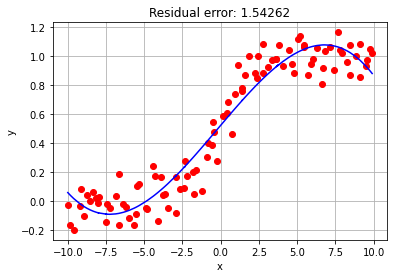

In [91]:

N_pol = 3 # select the order of poly. eg: n=3 --> [x**3  x**2  x  1]

X_new = np.ones_like(x)  #create a 1D array of as many elements as in x.

for n_pol in range(1,N_pol+1):
    X_new = np.column_stack([X_new, x**n_pol])

X_new = np.flip(X_new, axis=1) #Now, flip to make higher order axis first.

theta_new, residual_new, _, _ = np.linalg.lstsq(X_new, y,rcond=None)
print(theta_new)  #Since everyting is being added to create y_new order won't matter.


#Now, calculate Y_new
y_new = np.ones_like(x)*theta_new[-1]  #multiply with last index value to create y_new
for n_pol in range(1,N_pol+1):
    idx = len(theta_new)-1-n_pol  #-1 because last index value has already been multiplied, to access elements from last to first.
    y_new = y_new + x**n_pol * theta_new[idx]

    
#Plot
plt.plot(x, y, 'ro')
plt.plot(x, y_new, 'b-')

plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.title('Residual error: %.5f' % (residual_new))
plt.grid()
plt.show()